In [1]:
import pandas as pd

In [2]:
houses = pd.read_csv('Downloads/houses_dataset.csv')
houses.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1329,1330,60,RL,63.0,9084,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,176500
228,229,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125000
1583,990,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,197000
65,66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000
918,919,60,RL,103.0,13125,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,11,2007,WD,Normal,238000
411,412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,145000
1351,1352,60,RL,70.0,9247,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,171000
260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500


In [3]:
houses = houses[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']]
houses.sample(10)


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
1179,1124,3,1,5,4621.0,NaN,Y,?,4,93000
1696,1073,2,1,6,1482.0,Unf,Y,?,12,108480
1624,1768,3,1,7,4070.0,Unf,Y,?,6,175000
770,858,2,1,5,1165.0,Unf,Y,?,4,134900
190,2727,3,1,8,653.0,Unf,Y,?,12,315000
1257,864,2,1,8,2023.0,NaN,Y,?,7,99900
1075,1740,3,1,6,4980.0,Unf,Y,?,7,219500
1181,1652,2,1,5,1341.0,Fin,Y,?,11,392500
490,1304,3,1,6,5065.0,Fin,Y,?,6,115000
1759,672,2,1,8,4473.0,Unf,Y,?,8,108000


In [4]:
#remove duplicates

In [5]:
duplicates_count = len(houses) - len(houses.drop_duplicates())
duplicates_count

300

In [6]:
houses.drop_duplicates(inplace=True)
houses.sample(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
1367,1475,4,1,6,3867.0,RFn,Y,?,7,127000
239,1487,3,1,4,2006.0,Unf,Y,?,4,113000
1212,672,2,1,6,4358.0,Unf,Y,?,8,113000
1413,1844,2,1,5,4100.0,Fin,Y,?,9,257000
1030,1928,5,2,8,990.0,NaN,Y,?,7,160000
725,864,3,1,6,3865.0,Unf,Y,?,11,120500
1154,1820,4,1,6,2015.0,Unf,Y,?,5,201800
420,1344,2,2,5,3784.0,Fin,Y,?,11,206300
662,1392,2,1,3,3933.0,RFn,Y,?,7,110000
457,1663,2,1,6,1069.0,Fin,Y,?,3,256000


In [7]:
houses.shape

(1460, 10)

In [8]:
houses.isnull().sum().sort_values(ascending=False)/len(houses)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

In [9]:
import numpy as np

houses['GarageFinish'].replace(np.nan, 'NoGarage', inplace=True)
houses['GarageFinish'].isnull().sum()

0

In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
houses['RoofSurface'] = imp.fit_transform(houses[['RoofSurface']])

In [11]:
houses.drop(columns='ChimneyStyle', inplace=True)
houses.sample(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
439,1196,3,1,8,1816.0,Unf,Y,8,110000
613,1120,3,1,5,4049.0,NoGarage,Y,12,147000
570,1728,6,2,5,4118.0,Unf,Y,11,142600
913,2002,4,2,6,3686.0,Unf,N,8,145000
645,981,3,1,5,4869.0,Unf,Y,3,143250
977,1241,1,1,5,690.0,Fin,Y,11,199900
398,1077,2,1,2,674.0,Unf,Y,11,67000
1373,2633,2,1,5,2420.0,RFn,Y,3,466500
1294,864,2,1,7,4739.0,Unf,Y,4,115000
315,1432,3,1,5,3427.0,Fin,Y,7,188500


array([[<AxesSubplot:title={'center':'RoofSurface'}>]], dtype=object)

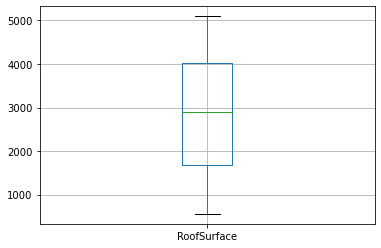

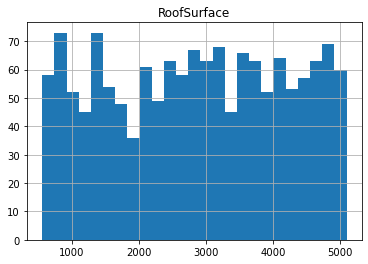

In [12]:
houses[['RoofSurface']].boxplot()
houses[['RoofSurface']].hist(bins=25)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mms = MinMaxScaler()
houses['RoofSurface'] = mms.fit_transform(houses[['RoofSurface']])
houses.sample(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
1179,1124,3,1,5,0.895526,NoGarage,Y,4,93000
1019,1506,2,1,5,0.557858,Fin,Y,4,213490
980,999,3,1,9,0.853427,RFn,Y,7,178400
779,1004,2,1,5,0.931012,Unf,Y,5,135000
318,2646,4,1,5,0.411065,RFn,Y,4,260000
632,1411,3,1,5,0.513996,Fin,Y,4,82500
1052,1977,4,1,6,0.297333,RFn,Y,6,165000
790,1145,2,1,5,0.340974,Fin,Y,9,160200
911,1268,3,1,7,0.165528,Unf,Y,10,143500
1182,4476,4,1,5,0.852546,Fin,Y,7,745000


array([[<AxesSubplot:title={'center':'GrLivArea'}>]], dtype=object)

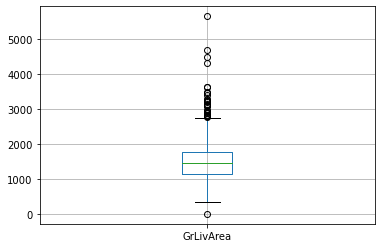

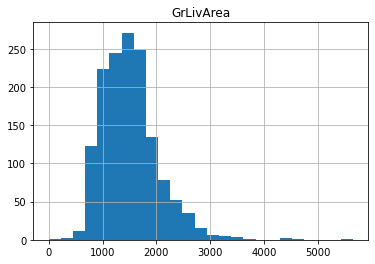

In [15]:
houses[['GrLivArea']].boxplot()
houses[['GrLivArea']].hist(bins=25)

In [16]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
houses['GrLivArea'] = rb.fit_transform(houses[['GrLivArea']])
houses.sample(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
737,0.520664,3,1,5,0.497245,Fin,Y,6,239900
358,-0.173040,3,1,4,0.009698,Unf,Y,7,130000
40,-0.216300,3,1,5,0.183381,RFn,Y,12,160000
389,1.341058,3,1,5,0.127838,Fin,Y,8,426000
1333,-0.160680,2,1,6,0.714790,Unf,Y,7,125500
1128,0.764774,4,1,5,0.451620,Fin,Y,7,215000
1044,1.637698,4,1,5,0.651311,Fin,Y,7,278000
940,0.407879,4,2,5,0.153626,Unf,Y,7,150900
885,0.378525,2,1,5,0.040776,Fin,Y,1,328900
557,-0.197760,3,1,6,0.443024,Unf,Y,9,108000


In [17]:
houses[['BedroomAbvGr','KitchenAbvGr','OverallCond']] = mms.fit_transform(houses[['BedroomAbvGr','KitchenAbvGr','OverallCond']])
houses.sample(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
851,-0.012360,0.250,0.333333,0.500,0.400044,Fin,Y,5,215000
1247,-0.664349,0.375,0.333333,0.500,0.020498,Unf,Y,5,169900
701,-0.463499,0.375,0.333333,0.500,0.752259,Unf,Y,7,140000
681,0.086520,0.375,0.333333,0.500,0.712585,Unf,Y,7,159434
972,-0.843569,0.250,0.333333,0.500,0.692749,Unf,Y,4,99500
900,-0.936269,0.250,0.333333,0.625,0.570421,Unf,Y,6,110000
963,0.519119,0.250,0.333333,0.500,0.024686,Fin,Y,5,239000
518,0.512939,0.375,0.333333,0.500,0.702887,RFn,Y,5,211000
1220,-0.852839,0.250,0.333333,0.500,0.402248,Unf,Y,11,115000
995,-0.361530,0.375,0.333333,0.750,0.027331,Unf,Y,8,121600


In [18]:
houses['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
houses['Fin'], houses['RFn'], houses['Unf'], houses['NoGarage'] = ohe.fit_transform(houses[['GarageFinish']]).T
houses.drop(columns='GarageFinish', inplace=True)
houses.sample(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,RFn,Unf,NoGarage
452,0.451139,0.375,0.333333,0.500,0.025788,Y,7,204000,1.0,0.0,0.0,0.0
367,-0.050985,0.375,0.333333,0.500,0.221512,Y,12,165000,0.0,0.0,1.0,0.0
181,0.522209,0.500,0.333333,0.625,0.416575,Y,7,200100,0.0,0.0,0.0,1.0
1283,0.556199,0.500,0.666667,0.500,0.165748,Y,4,139000,0.0,1.0,0.0,0.0
537,-0.926999,0.375,0.333333,0.500,0.253912,Y,4,111250,0.0,0.0,0.0,1.0
1336,0.296640,0.500,0.666667,0.500,0.943134,Y,11,135000,0.0,0.0,0.0,1.0
1216,0.676709,0.500,0.666667,0.500,0.426714,Y,4,112000,0.0,0.0,0.0,1.0
1002,0.169950,0.375,0.333333,0.500,0.532510,Y,7,232000,0.0,0.0,1.0,0.0
718,1.473928,0.375,0.333333,0.500,0.918889,Y,8,341000,0.0,0.0,1.0,0.0
997,-0.033990,0.250,0.333333,0.625,0.433546,Y,2,185000,0.0,0.0,1.0,0.0
